# Load Precipitation from TRMM3B43(No API)  0.25 degree 01-12/2001

In [1]:
import os
import h5py
import numpy as np
#%pip install xarray
import xarray as xr
import os,glob
import numpy as np
#%pip install pyhdf.SD
#from pyhdf.SD import SD

hdf_dir = "D:/Desktop/mentor_research/code/dataset/hdf_files"
# list of all hdf files
hdf_files = [os.path.join(hdf_dir, f) for f in os.listdir(hdf_dir) if f.endswith(".HDF")]

print(f"Found {len(hdf_files)} HDF files:")
for f in hdf_files:
    print(f)


Found 12 HDF files:
D:/Desktop/mentor_research/code/dataset/hdf_files\3B43.20010101.7A.HDF
D:/Desktop/mentor_research/code/dataset/hdf_files\3B43.20010201.7A.HDF
D:/Desktop/mentor_research/code/dataset/hdf_files\3B43.20010301.7A.HDF
D:/Desktop/mentor_research/code/dataset/hdf_files\3B43.20010401.7A.HDF
D:/Desktop/mentor_research/code/dataset/hdf_files\3B43.20010501.7A.HDF
D:/Desktop/mentor_research/code/dataset/hdf_files\3B43.20010601.7A.HDF
D:/Desktop/mentor_research/code/dataset/hdf_files\3B43.20010701.7A.HDF
D:/Desktop/mentor_research/code/dataset/hdf_files\3B43.20010801.7A.HDF
D:/Desktop/mentor_research/code/dataset/hdf_files\3B43.20010901.7A.HDF
D:/Desktop/mentor_research/code/dataset/hdf_files\3B43.20011001.7A.HDF
D:/Desktop/mentor_research/code/dataset/hdf_files\3B43.20011101.7A.HDF
D:/Desktop/mentor_research/code/dataset/hdf_files\3B43.20011201.7A.HDF


In [2]:
import os
import numpy as np
from pyhdf.SD import SD, SDC


In [3]:
import numpy as np

file_path = 'D:/Desktop/mentor_research/code/dataset/hdf_files/3B43.20010101.7A.HDF'

dataset = SD('D:/Desktop/mentor_research/code/dataset/hdf_files/3B43.20010101.7A.HDF', SDC.READ)
dataset 

In [4]:
# TRMM3B43 precipitation data 01/01/2001-12/31/2001
# month
# 0.25 degree
from pyhdf.SD import SD, SDC
filepath = "D:/Desktop/mentor_research/code/dataset/hdf_files/3B43.20010101.7A.HDF"
trmm = SD(filepath, SDC.READ)
attrs = trmm.attributes()
for attr_name, attr_value in attrs.items():
    print(f"{attr_name}: {attr_value}")
# Month
# LatitudeResolution=0.25;
# LongitudeResolution=0.25; 

FileHeader: AlgorithmID=3B43;
AlgorithmVersion=3B43_7.0;
FileName=3B43.20010101.7A.HDF;
GenerationDateTime=2012-11-28T04:06:48.000Z;
StartGranuleDateTime=2001-01-01T00:00:00.000Z;
StopGranuleDateTime=2001-01-31T23:59:59.999Z;
GranuleNumber=;
NumberOfSwaths=0;
NumberOfGrids=1;
GranuleStart=;
TimeInterval=MONTH;
ProcessingSystem=PPS;
ProductVersion=7A;
MissingData=;

FileInfo: DataFormatVersion=m;
TKCodeBuildVersion=1;
MetadataVersion=m;
FormatPackage=HDF Version 4.2 Release 4, January 25, 2009;
BlueprintFilename=TRMM.V7.3B43.blueprint.xml;
BlueprintVersion=BV_13;
TKIOVersion=1.6;
MetadataStyle=PVL;
EndianType=LITTLE_ENDIAN;

GridHeader: BinMethod=ARITHMETIC_MEAN;
Registration=CENTER;
LatitudeResolution=0.25;
LongitudeResolution=0.25;
NorthBoundingCoordinate=50;
SouthBoundingCoordinate=-50;
EastBoundingCoordinate=180;
WestBoundingCoordinate=-180;
Origin=SOUTHWEST;



In [5]:
# Extracting precipitation data for IBERIA
iberia_lat_range = (36, 44)
iberia_lon_range = (-9, 3)

precip = trmm.select('precipitation')[:]
precip = np.transpose(precip)

theLats = np.arange(-49.875, 50, 0.25) 
theLons = np.arange(-179.875, 180, 0.25)

precip[precip < 0] = np.nan

lat_mask = (theLats >= iberia_lat_range[0]) & (theLats <= iberia_lat_range[1])
lon_mask = (theLons >= iberia_lon_range[0]) & (theLons <= iberia_lon_range[1])

precip_iberia = precip[lat_mask, :][:, lon_mask]
lats_iberia = theLats[lat_mask]
lons_iberia = theLons[lon_mask]

print(f"Extracted precipitation data shape: {precip_iberia.shape}")
print(f"Latitude range: {lats_iberia.min()} to {lats_iberia.max()}")
print(f"Longitude range: {lons_iberia.min()} to {lons_iberia.max()}")

Extracted precipitation data shape: (32, 48)
Latitude range: 36.125 to 43.875
Longitude range: -8.875 to 2.875


In [6]:
precip_iberia_original = precip_iberia.copy()

In [1]:
# Loop through all TRMM files
import os
import glob
import numpy as np
from pyhdf.SD import SD, SDC
data_dir = "D:/Desktop/mentor_research/code/dataset/hdf_files/"

hdf_files = glob.glob(os.path.join(data_dir, "*.HDF"))

iberia_lat_range = (36, 44)
iberia_lon_range = (-9, 3)
theLats = np.arange(-49.875, 50, 0.25)
theLons = np.arange(-179.875, 180, 0.25)

iberia_precip_data = {}

for filepath in hdf_files:
    print(f"Processing: {filepath}")
    
    trmm = SD(filepath, SDC.READ)
    
    precip = trmm.select('precipitation')[:]
    precip = np.transpose(precip)  # TRMM data usually requires transposition

    # Process invalid data (set negative values to NaN)
    precip[precip < 0] = np.nan

    # ✅ Extract data for the Iberian Peninsula region
    lat_mask = (theLats >= iberia_lat_range[0]) & (theLats <= iberia_lat_range[1])
    lon_mask = (theLons >= iberia_lon_range[0]) & (theLons <= iberia_lon_range[1])
    
    precip_iberia = precip[lat_mask, :][:, lon_mask]
    lats_iberia = theLats[lat_mask]
    lons_iberia = theLons[lon_mask]

    # ✅ Extract time information from the filename
    filename = os.path.basename(filepath)
    date_str = filename.split(".")[1]  # e.g., 20010101 from `3B43.20010101.7A.HDF`
    
    # ✅ Store the data
    iberia_precip_data[date_str] = {
        "precipitation": precip_iberia,
        "lats": lats_iberia,
        "lons": lons_iberia
    }
    
    print(f"✅ Processed {filename} | Data Shape: {precip_iberia.shape}")

# ✅ Check the extracted time range
print(f"Extracted data for {len(iberia_precip_data)} months")


Processing: D:/Desktop/mentor_research/code/dataset/hdf_files\3B43.20010101.7A.HDF
✅ Processed 3B43.20010101.7A.HDF | Data Shape: (32, 48)
Processing: D:/Desktop/mentor_research/code/dataset/hdf_files\3B43.20010201.7A.HDF
✅ Processed 3B43.20010201.7A.HDF | Data Shape: (32, 48)
Processing: D:/Desktop/mentor_research/code/dataset/hdf_files\3B43.20010301.7A.HDF
✅ Processed 3B43.20010301.7A.HDF | Data Shape: (32, 48)
Processing: D:/Desktop/mentor_research/code/dataset/hdf_files\3B43.20010401.7A.HDF
✅ Processed 3B43.20010401.7A.HDF | Data Shape: (32, 48)
Processing: D:/Desktop/mentor_research/code/dataset/hdf_files\3B43.20010501.7A.HDF
✅ Processed 3B43.20010501.7A.HDF | Data Shape: (32, 48)
Processing: D:/Desktop/mentor_research/code/dataset/hdf_files\3B43.20010601.7A.HDF
✅ Processed 3B43.20010601.7A.HDF | Data Shape: (32, 48)
Processing: D:/Desktop/mentor_research/code/dataset/hdf_files\3B43.20010701.7A.HDF
✅ Processed 3B43.20010701.7A.HDF | Data Shape: (32, 48)
Processing: D:/Desktop/ment

In [2]:
iberia_precip_data

{'20010101': {'precipitation': array([[0.0453629 , 0.03995968, 0.05939517, ..., 0.248377  , 0.24226555,
          0.2355642 ],
         [0.05358871, 0.03774194, 0.05237903, ..., 0.28646806, 0.29882795,
          0.29839   ],
         [0.06629033, 0.0366129 , 0.04741936, ..., 0.28190213, 0.3266886 ,
          0.3215991 ],
         ...,
         [0.503428  , 0.5080353 , 0.5289576 , ..., 0.1742279 , 0.1843067 ,
          0.19935474],
         [0.5030268 , 0.50655353, 0.4943265 , ..., 0.17680979, 0.18681128,
          0.20157938],
         [0.5162236 , 0.5091128 , 0.49040043, ..., 0.1757659 , 0.1854332 ,
          0.1970876 ]], dtype=float32),
  'lats': array([36.125, 36.375, 36.625, 36.875, 37.125, 37.375, 37.625, 37.875,
         38.125, 38.375, 38.625, 38.875, 39.125, 39.375, 39.625, 39.875,
         40.125, 40.375, 40.625, 40.875, 41.125, 41.375, 41.625, 41.875,
         42.125, 42.375, 42.625, 42.875, 43.125, 43.375, 43.625, 43.875]),
  'lons': array([-8.875, -8.625, -8.375, -8.125, -

In [3]:
import xarray as xr
import numpy as np
import os

# ✅ Get time dimension (maintaining the YYYYMMDD format)
time_values = sorted(iberia_precip_data.keys())  # '20010101', '20010201', ..., '20011201'
time_values_dt = np.array([np.datetime64(f"{t[:4]}-{t[4:6]}-{t[6:8]}") for t in time_values])  # Convert to datetime64

# ✅ Extract precipitation data and check shape
precip_arrays = [iberia_precip_data[t]['precipitation'] for t in time_values]
lats = iberia_precip_data[time_values[0]]['lats']  # Use the original key without modifying the format
lons = iberia_precip_data[time_values[0]]['lons']

# ✅ Convert to Xarray DataArray
precip_da = xr.DataArray(
    data=np.stack(precip_arrays),  # Stack along the time dimension
    dims=("time", "lats", "lons"),
    coords={"time": time_values_dt, "lats": lats, "lons": lons},
    attrs={"description": "Monthly precipitation data for the Iberian Peninsula"}
)

# ✅ Convert to Dataset and store
precip_ds = xr.Dataset({"precipitation": precip_da})

# ✅ View the data structure
print(precip_ds)

# ✅ Save as NetCDF file
output_dir = r"D:\Desktop\mentor_research\code\dataset\Precipitation_processed"
os.makedirs(output_dir, exist_ok=True)
precip_ds.to_netcdf(os.path.join(output_dir, "precip_2001_resampled.nc"))

print(f"✅ Precipitation data has been converted and stored at {output_dir}")


C:\Users\18857\AppData\Local\Temp\ipykernel_12808\1105593896.py:15: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  precip_da = xr.DataArray(


<xarray.Dataset>
Dimensions:        (time: 12, lats: 32, lons: 48)
Coordinates:
  * time           (time) datetime64[ns] 2001-01-01 2001-02-01 ... 2001-12-01
  * lats           (lats) float64 36.12 36.38 36.62 36.88 ... 43.38 43.62 43.88
  * lons           (lons) float64 -8.875 -8.625 -8.375 ... 2.375 2.625 2.875
Data variables:
    precipitation  (time, lats, lons) float32 0.04536 0.03996 ... 0.04851 0.0387
✅ Precipitation data has been converted and stored at D:\Desktop\mentor_research\code\dataset\Precipitation_processed


# Load NDVI from MOD13A3 v6(Google engine) 1km 01-12/2001

In [ ]:
# instead of NDVI from spot, we use NDVI from MODIS(MOD13A3 v6)

In [ ]:
# 用google engine下载NDVI到google drive上
# 4/1AQSTgQHeKdW804jBUvhhgVTx14qiIZVe_aYS3pyfclk0PYeZ9UrHsmD9STM
import ee
ee.Authenticate()
ee.Initialize()

In [ ]:
# import ee
# # The raw values in the dataset are in the range (−10,000 to 10,000) instead of (-1 to 1).
# # Initialize GEE
# ee.Initialize()

# # Define the region and time range
# iberia_bbox = ee.Geometry.Rectangle(
#     coords=[-9, 36, 3, 44],  # Format: [min_lon, min_lat, max_lon, max_lat]
#     proj="EPSG:4326",
#     geodesic=False
# )

# date_range = ('2001-01-01', '2001-12-31')

# # Load the MODIS monthly NDVI dataset (MOD13A3 v6)
# modis_ndvi = ee.ImageCollection('MODIS/061/MOD13A3') \
#     .filterDate(*date_range) \
#     .filterBounds(iberia_bbox) \
#     .select('NDVI')  # NDVI band

# # Print dataset information (optional)
# print(f"Dataset size: {modis_ndvi.size().getInfo()} images")

# # Export all monthly data to Google Drive
# for i in range(1, 13):
#     # Get single month data
#     monthly_image = modis_ndvi.filter(ee.Filter.calendarRange(i, i, 'month')).first()
    
#     # Define export task
#     task = ee.batch.Export.image.toDrive(
#         image=monthly_image.clip(iberia_bbox),
#         description=f'NDVI_2001_{i:02d}',
#         folder='GEE_Exports',  # Folder name in Google Drive
#         region=iberia_bbox,
#         scale=1000,  # 1 km resolution
#         crs='EPSG:4326',
#         fileFormat='GeoTIFF'
#     )
#     task.start()
#     print(f'Task 2001-{i:02d} submitted. Status: {task.status()["state"]}')

# print("All tasks submitted, please check Google Drive for downloads.")


Dataset size: 12 images
Task 2001-01 submitted. Status: READY
Task 2001-02 submitted. Status: READY
Task 2001-03 submitted. Status: READY
Task 2001-04 submitted. Status: READY
Task 2001-05 submitted. Status: READY
Task 2001-06 submitted. Status: READY
Task 2001-07 submitted. Status: READY
Task 2001-08 submitted. Status: READY
Task 2001-09 submitted. Status: READY
Task 2001-10 submitted. Status: READY
Task 2001-11 submitted. Status: READY
Task 2001-12 submitted. Status: READY
All tasks submitted, please check Google Drive for downloads.


In [148]:
import ee

# Initialize GEE
ee.Initialize()

# Define region and time range
iberia_bbox = ee.Geometry.Rectangle(
    coords=[-9, 36, 3, 44],  # [min_lon, min_lat, max_lon, max_lat]
    proj="EPSG:4326",
    geodesic=False
)

date_range = ('2001-01-01', '2001-12-31')

# Load MODIS NDVI dataset
modis_ndvi = ee.ImageCollection('MODIS/061/MOD13A3') \
    .filterDate(*date_range) \
    .filterBounds(iberia_bbox) \
    .select('NDVI')

# Print dataset info
print(f"Dataset size: {modis_ndvi.size().getInfo()} images")

# Export monthly NDVI data to Google Drive
for i in range(1, 13):
    # Retrieve the first image for the given month and scale NDVI
    monthly_image = modis_ndvi.filter(ee.Filter.calendarRange(i, i, 'month')).first()
    
    # Apply scaling correction
    monthly_image = monthly_image.multiply(0.0001).clip(iberia_bbox)  # Scale factor: 1/10,000

    # Define export task
    task = ee.batch.Export.image.toDrive(
        image=monthly_image,
        description=f'NDVI_2001_{i:02d}',
        folder='GEE_Exports1',  # Google Drive folder
        region=iberia_bbox,
        scale=1000,  # 1km resolution
        crs='EPSG:4326',
        fileFormat='GeoTIFF'
    )
    task.start()
    print(f'Task 2001-{i:02d} submitted. Status: {task.status()["state"]}')

print("All tasks have been submitted. Check Google Drive for results.")


Dataset size: 12 images
Task 2001-01 submitted. Status: READY
Task 2001-02 submitted. Status: READY
Task 2001-03 submitted. Status: READY
Task 2001-04 submitted. Status: READY
Task 2001-05 submitted. Status: READY
Task 2001-06 submitted. Status: READY
Task 2001-07 submitted. Status: READY
Task 2001-08 submitted. Status: READY
Task 2001-09 submitted. Status: READY
Task 2001-10 submitted. Status: READY
Task 2001-11 submitted. Status: READY
Task 2001-12 submitted. Status: READY
All tasks have been submitted. Check Google Drive for results.


In [ ]:
#  reload D:\Desktop\mentor_research\code\dataset\GEE_Exports这个目录下的12张有关NDVI的月度tif

In [5]:
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
import xarray as xr

# 1km resolution data
# Configuration parameters
tif_dir = r"D:\\Desktop\\mentor_research\\code\\dataset\\GEE_Exports"
output_dir = r"D:\\Desktop\\mentor_research\\code\\dataset\\NDVI_processed"
os.makedirs(output_dir, exist_ok=True)

# Step 1: Read all TIFF files ------------------------------------------------------
def read_ndvi_tifs(tif_dir):
    """Read all NDVI TIFF files in the directory and sort them by time"""
    files = [f for f in os.listdir(tif_dir) if f.endswith('.tif') and 'NDVI' in f]
    files.sort()
    
    datasets = []
    for f in files:
        path = os.path.join(tif_dir, f)
        with rasterio.open(path) as src:
            data = src.read(1)
            meta = src.meta.copy()
            transform = src.transform
            
            # Convert CRS to a WKT string or EPSG code
            crs_str = src.crs.to_wkt()  # or use src.crs.to_epsg()
            
            da = xr.DataArray(
                data,
                dims=('lats', 'lons'),
                coords={
                    'lats': np.arange(data.shape[0]) * transform[4] + transform[5],
                    'lons': np.arange(data.shape[1]) * transform[0] + transform[2]
                },
                attrs={
                    'crs': crs_str,  # Use string instead of CRS object
                    'transform': list(transform),  # Convert Affine object to list
                    'month': f.split('_')[2][:2]
                }
            )
            datasets.append(da)
    
    ds = xr.concat(datasets, dim='time').assign_coords(
        time=np.arange(1, 13)
    )
    return ds

# Read data
ndvi_ds_1km = read_ndvi_tifs(tif_dir)
# Correct NDVI scaling by dividing all values by 10,000
ndvi_ds_1km = ndvi_ds_1km / 10000.0

# Step 2: Basic data analysis ------------------------------------------------------
# View dataset structure
print("Dataset structure:\n", ndvi_ds_1km)

# Calculate monthly average
monthly_avg = ndvi_ds_1km.mean(dim=['lons', 'lats'])

# Calculate annual average
annual_avg = ndvi_ds_1km.mean(dim='time')

# Step 3: Visual analysis ------------------------------------------------------
# Monthly trend curve
plt.figure(figsize=(10, 5))
monthly_avg.plot(marker='o', color='green')
plt.title('2001 Monthly NDVI Variation for the Iberian Peninsula')
plt.ylabel('NDVI')
plt.xlabel('Month')
plt.xticks(range(12), [f'{i+1} month' for i in range(12)])
plt.savefig(os.path.join(output_dir, 'monthly_trend.png'))
plt.close()

# Spatial distribution of annual average
plt.figure(figsize=(12, 8))
annual_avg.plot(cmap='YlGn', add_colorbar=True)
plt.title('Spatial Distribution of Annual Average NDVI in 2001')
plt.axis('off')
plt.savefig(os.path.join(output_dir, 'annual_avg.png'))
plt.close()

# Step 4: Data export ------------------------------------------------------
# Save as NetCDF format
ndvi_ds_1km.to_netcdf(os.path.join(output_dir, 'ndvi_2001_1km.nc'))

# Save statistical results
with open(os.path.join(output_dir, 'statistics.txt'), 'w') as f:
    f.write(f"Annual average NDVI: {annual_avg.mean().values:.3f}\n")
    f.write(f"Highest monthly NDVI: {monthly_avg.max().values:.3f} (Month {int(monthly_avg.argmax())})\n")
    f.write(f"Lowest monthly NDVI: {monthly_avg.min().values:.3f} (Month {int(monthly_avg.argmin())})\n")

print("Analysis results have been saved to:", output_dir)


Dataset structure:
 <xarray.DataArray (time: 12, lats: 892, lons: 1336)>
array([[[0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , ..., 0.6247, 0.6247, 0.6186],
        [0.    , 0.    , 0.    , ..., 0.6192, 0.6192, 0.5791],
        ...,
        [0.    , 0.    , 0.    , ..., 0.224 , 0.224 , 0.1662],
        [0.    , 0.    , 0.    , ..., 0.2035, 0.2035, 0.1763],
        [0.    , 0.    , 0.    , ..., 0.1707, 0.1707, 0.1954]],

       [[0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , ..., 0.5994, 0.5994, 0.5946],
        [0.    , 0.    , 0.    , ..., 0.5929, 0.5929, 0.5884],
        ...,
        [0.    , 0.    , 0.    , ..., 0.2289, 0.2289, 0.1772],
        [0.    , 0.    , 0.    , ..., 0.2119, 0.2119, 0.2075],
        [0.    , 0.    , 0.    , ..., 0.1824, 0.1824, 0.2394]],

       [[0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , ..., 0.6892, 0.6892, 0.6395],
        [0.    

In [6]:
new_time_values = np.array([np.datetime64(f"2001-{month:02d}-01") for month in range(1, 13)])
ndvi_ds_1km = ndvi_ds_1km.assign_coords(time=new_time_values)

C:\Users\18857\AppData\Local\Temp\ipykernel_12808\221185293.py:2: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  ndvi_ds_1km = ndvi_ds_1km.assign_coords(time=new_time_values)
C:\Users\18857\AppData\Local\Temp\ipykernel_12808\221185293.py:2: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or V

In [7]:
ndvi_ds_1km

<xarray.DataArray (time: 12, lats: 892, lons: 1336)>
array([[[0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , ..., 0.6247, 0.6247, 0.6186],
        [0.    , 0.    , 0.    , ..., 0.6192, 0.6192, 0.5791],
        ...,
        [0.    , 0.    , 0.    , ..., 0.224 , 0.224 , 0.1662],
        [0.    , 0.    , 0.    , ..., 0.2035, 0.2035, 0.1763],
        [0.    , 0.    , 0.    , ..., 0.1707, 0.1707, 0.1954]],

       [[0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , ..., 0.5994, 0.5994, 0.5946],
        [0.    , 0.    , 0.    , ..., 0.5929, 0.5929, 0.5884],
        ...,
        [0.    , 0.    , 0.    , ..., 0.2289, 0.2289, 0.1772],
        [0.    , 0.    , 0.    , ..., 0.2119, 0.2119, 0.2075],
        [0.    , 0.    , 0.    , ..., 0.1824, 0.1824, 0.2394]],

       [[0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , ..., 0.6892, 0.6892, 0.6395],
        [0.    , 0.    , 0.    , ..., 0.6514, 0.6514, 0.5865],
        ...,
...
        ...,
        [0.    , 0.    , 0.    , ..., 0.1168, 0.1168, 0.1182],
        [0.    , 0.    , 0.    , ..., 0.1241, 0.1241, 0.1337],
        [0.    , 0.    , 0.    , ..., 0.1083, 0.1083, 0.1155]],

       [[0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , ..., 0.6036, 0.6036, 0.6462],
        [0.    , 0.    , 0.    , ..., 0.6014, 0.6014, 0.6645],
        ...,
        [0.    , 0.    , 0.    , ..., 0.1093, 0.1093, 0.1164],
        [0.    , 0.    , 0.    , ..., 0.1169, 0.1169, 0.1323],
        [0.    , 0.    , 0.    , ..., 0.1195, 0.1195, 0.1214]],

       [[0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , ..., 0.5656, 0.5656, 0.593 ],
        [0.    , 0.    , 0.    , ..., 0.5316, 0.5316, 0.5939],
        ...,
        [0.    , 0.    , 0.    , ..., 0.1227, 0.1227, 0.1295],
        [0.    , 0.    , 0.    , ..., 0.1324, 0.1324, 0.1395],
        [0.    , 0.    , 0.    , ..., 0.1267, 0.1267, 0.1202]]])
Coordinates:
  * lats     (lats) float64 44.01 44.0 43.99 43.98 ... 36.03 36.02 36.01 36.0
  * lons     (lons) float64 -9.001 -8.992 -8.983 -8.974 ... 2.973 2.982 2.991
  * time     (time) datetime64[ns] 2001-01-01 2001-02-01 ... 2001-12-01

In [ ]:
precip_ds

<xarray.Dataset>
Dimensions:        (time: 12, lats: 32, lons: 48)
Coordinates:
  * time           (time) datetime64[ns] 2001-01-01 2001-02-01 ... 2001-12-01
  * lats           (lats) float64 36.12 36.38 36.62 36.88 ... 43.38 43.62 43.88
  * lons           (lons) float64 -8.875 -8.625 -8.375 ... 2.375 2.625 2.875
Data variables:
    precipitation  (time, lats, lons) float32 0.04536 0.03996 ... 0.04851 0.0387

# Resample to 0.25, 0.5, 0.75, 1.00, 1.25, 1.50, use grid averaging

In [9]:
import os
import rasterio
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from rasterio.plot import show
import pandas as pd

# ✅ Configuration parameters
tif_dir = r"D:/Desktop/mentor_research/code/dataset/GEE_Exports"
output_dir = r"D:/Desktop/mentor_research/code/dataset/NDVI_processed/resampled"
os.makedirs(output_dir, exist_ok=True)

# ✅ Read all NDVI TIFF files
def read_ndvi_tifs(tif_dir):
    """Read all NDVI TIFF files in the directory, sorted by time"""
    files = [f for f in os.listdir(tif_dir) if f.endswith('.tif') and 'NDVI' in f]
    files.sort()
    datasets = []
    
    for f in files:
        path = os.path.join(tif_dir, f)
        with rasterio.open(path) as src:
            data = src.read(1).astype(np.float32) / 10000  # Read NDVI data
            data[data == src.nodata] = np.nan  # Handle invalid values
            transform = src.transform
            lats = np.arange(data.shape[0]) * transform[4] + transform[5]
            lons = np.arange(data.shape[1]) * transform[0] + transform[2]
            
            # Extract month information from filename
            month = int(f.split('_')[2][:2])
            
            da = xr.DataArray(
                data,
                dims=('lats', 'lons'),
                coords={'lats': lats, 'lons': lons},
                attrs={'month': month}
            )
            datasets.append(da)
    
    # Create a time series for the year 2001
    time_coords = pd.date_range(start='2001-01-01', periods=12, freq='MS')
    
    # Sort the datasets by month and assign time coordinates
    datasets.sort(key=lambda x: x.attrs['month'])
    ds = xr.concat(datasets, dim='time')
    ds = ds.assign_coords(time=time_coords)
    
    return ds

# ✅ Define resampling function
def regrid_ndvi(ds, target_lats, target_lons, method="linear"):
    """Resample NDVI data to the target resolution"""
    regridded_ds = ds.interp(lats=target_lats, lons=target_lons, method=method)
    return regridded_ds

# ✅ Create target grid function
def create_target_grid(min_lat, max_lat, min_lon, max_lon, resolution):
    """Create a target latitude-longitude grid with the specified resolution"""
    # Calculate half the cell size (half resolution offset)
    half_res = resolution / 2
    
    # Create arrays of latitude and longitude values
    target_lats = np.arange(min_lat + half_res, max_lat, resolution)
    target_lons = np.arange(min_lon + half_res, max_lon, resolution)
    
    return target_lats, target_lons

# ✅ Read data
print("Reading NDVI data...")
ndvi_ds = read_ndvi_tifs(tif_dir)

# ✅ Define multiple target resolutions
resolutions = [0.25, 0.5, 0.75, 1.0, 1.25, 1.5]

# ✅ Process each resolution
for res in resolutions:
    print(f"Processing {res}° resolution...")
    
    # Create the target grid for the current resolution
    target_lats, target_lons = create_target_grid(36.0, 44.0, -9.0, 3.0, res)
    
    # Perform resampling
    ndvi_resampled = regrid_ndvi(ndvi_ds, target_lats, target_lons)
    
    # Save as a single xarray dataset
    output_path = os.path.join(output_dir, f"NDVI_2001_res{res:.2f}.nc")
    
    # Add resolution attribute
    ndvi_resampled.attrs['resolution'] = f"{res} degrees"
    ndvi_resampled.attrs['description'] = f"NDVI data resampled to {res}° resolution for 2001"
    
    # Save as a NetCDF file
    print(f"Saving data at {res}° resolution to {output_path}")
    ndvi_resampled.to_netcdf(output_path)
    
    # Create visualization
    plt.figure(figsize=(10, 8))
    ndvi_resampled.mean(dim='time').plot(cmap='YlGn', robust=True)
    plt.title(f'NDVI 2001 - Resolution: {res}°')
    
    # Save the visualization image
    fig_path = os.path.join(output_dir, f"NDVI_2001_res{res:.2f}.png")
    plt.savefig(fig_path, dpi=300)
    plt.close()

print("All resampling processes completed!")


Reading NDVI data...
Processing 0.25° resolution...
Saving data at 0.25° resolution to D:/Desktop/mentor_research/code/dataset/NDVI_processed/resampled\NDVI_2001_res0.25.nc
Processing 0.5° resolution...
Saving data at 0.5° resolution to D:/Desktop/mentor_research/code/dataset/NDVI_processed/resampled\NDVI_2001_res0.50.nc
Processing 0.75° resolution...
Saving data at 0.75° resolution to D:/Desktop/mentor_research/code/dataset/NDVI_processed/resampled\NDVI_2001_res0.75.nc
Processing 1.0° resolution...
Saving data at 1.0° resolution to D:/Desktop/mentor_research/code/dataset/NDVI_processed/resampled\NDVI_2001_res1.00.nc
Processing 1.25° resolution...
Saving data at 1.25° resolution to D:/Desktop/mentor_research/code/dataset/NDVI_processed/resampled\NDVI_2001_res1.25.nc
Processing 1.5° resolution...
Saving data at 1.5° resolution to D:/Desktop/mentor_research/code/dataset/NDVI_processed/resampled\NDVI_2001_res1.50.nc
All resampling processes completed!


In [10]:
import os
import xarray as xr
import matplotlib.pyplot as plt

# Configure data directory
data_dir = r"D:/Desktop/mentor_research/code/dataset/NDVI_processed/resampled"

# Define the resolution list
resolutions = [0.25, 0.5, 0.75, 1.0, 1.25, 1.5]

# Create a dictionary to store datasets for different resolutions
ndvi_datasets = {}

# Read data for each resolution and assign variable names
for res in resolutions:
    # Construct the file path
    file_path = os.path.join(data_dir, f"NDVI_2001_res{res:.2f}.nc")
    
    # Check if the file exists
    if os.path.exists(file_path):
        # Read the data
        print(f"Reading data at {res}° resolution...")
        
        # Assign a unique variable name for each resolution
        var_name = f"ndvi_res_{str(res).replace('.', '_')}"
        ndvi_datasets[var_name] = xr.open_dataset(file_path)
        
        # Print basic information about the dataset
        print(f"- Variable name: {var_name}")
        print(f"- Dimensions: {ndvi_datasets[var_name].dims}")
        print(f"- Time range: {ndvi_datasets[var_name].time.values[0]} to {ndvi_datasets[var_name].time.values[-1]}")
        
        # Retrieve the data variable name and print its shape
        data_var_name = list(ndvi_datasets[var_name].data_vars)[0]  # Get the name of the first data variable
        print(f"- Data variable name: {data_var_name}")
        print(f"- Data shape: {ndvi_datasets[var_name][data_var_name].shape}\n")
    else:
        print(f"Warning: File {file_path} does not exist")

# Example: Access variables at different resolutions
# You can access datasets at different resolutions as follows:
if 'ndvi_res_0_25' in ndvi_datasets:
    ndvi_res_0_25 = ndvi_datasets['ndvi_res_0_25']
    
if 'ndvi_res_0_5' in ndvi_datasets:
    ndvi_res_0_5 = ndvi_datasets['ndvi_res_0_5']
    
if 'ndvi_res_0_75' in ndvi_datasets:
    ndvi_res_0_75 = ndvi_datasets['ndvi_res_0_75']
    
if 'ndvi_res_1_0' in ndvi_datasets:
    ndvi_res_1_0 = ndvi_datasets['ndvi_res_1_0']
    
if 'ndvi_res_1_25' in ndvi_datasets:
    ndvi_res_1_25 = ndvi_datasets['ndvi_res_1_25']
    
if 'ndvi_res_1_5' in ndvi_datasets:
    ndvi_res_1_5 = ndvi_datasets['ndvi_res_1_5']


Reading data at 0.25° resolution...
- Variable name: ndvi_res_0_25
- Dimensions: Frozen({'lons': 48, 'lats': 32, 'time': 12})
- Time range: 2001-01-01T00:00:00.000000000 to 2001-12-01T00:00:00.000000000
- Data variable name: __xarray_dataarray_variable__
- Data shape: (12, 32, 48)

Reading data at 0.5° resolution...
- Variable name: ndvi_res_0_5
- Dimensions: Frozen({'lons': 24, 'lats': 16, 'time': 12})
- Time range: 2001-01-01T00:00:00.000000000 to 2001-12-01T00:00:00.000000000
- Data variable name: __xarray_dataarray_variable__
- Data shape: (12, 16, 24)

Reading data at 0.75° resolution...
- Variable name: ndvi_res_0_75
- Dimensions: Frozen({'lons': 16, 'time': 12, 'lats': 11})
- Time range: 2001-01-01T00:00:00.000000000 to 2001-12-01T00:00:00.000000000
- Data variable name: __xarray_dataarray_variable__
- Data shape: (12, 11, 16)

Reading data at 1.0° resolution...
- Variable name: ndvi_res_1_0
- Dimensions: Frozen({'time': 12, 'lats': 8, 'lons': 12})
- Time range: 2001-01-01T00:00

In [11]:
ndvi_res_0_5

<xarray.Dataset>
Dimensions:                        (lons: 24, lats: 16, time: 12)
Coordinates:
  * lons                           (lons) float64 -8.75 -8.25 ... 2.25 2.75
  * lats                           (lats) float64 36.25 36.75 ... 43.25 43.75
  * time                           (time) datetime64[ns] 2001-01-01 ... 2001-...
Data variables:
    __xarray_dataarray_variable__  (time, lats, lons) float64 ...

In [12]:
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Configure data directory
data_dir = r"D:/Desktop/mentor_research/code/dataset/NDVI_processed/resampled"
output_dir = data_dir  # Output to the same directory

# Define resolution list
resolutions = [0.25, 0.5, 0.75, 1.0, 1.25, 1.5]

# Define resampling function
def regrid_precip(ds, target_lats, target_lons, method="linear"):
    """Resample precipitation data to the target resolution and align dimensions"""
    regridded_ds = ds.interp(lats=target_lats, lons=target_lons, method=method)
    return regridded_ds

# Process each resolution
for res in resolutions:
    print(f"Processing precipitation data at {res}° resolution...")
    
    # Construct the corresponding NDVI file path to obtain dimension information
    ndvi_file_path = os.path.join(data_dir, f"NDVI_2001_res{res:.2f}.nc")
    
    if not os.path.exists(ndvi_file_path):
        print(f"Warning: NDVI file {ndvi_file_path} does not exist, skipping this resolution")
        continue
        
    # Read the NDVI dataset to get target dimensions
    ndvi_ds = xr.open_dataset(ndvi_file_path)
    
    # Retrieve NDVI latitude and longitude coordinates
    ndvi_var_name = list(ndvi_ds.data_vars)[0]
    target_lats = ndvi_ds.lats.values
    target_lons = ndvi_ds.lons.values
    
    # Resample precipitation data to match NDVI dimensions
    precip_resampled = regrid_precip(precip_ds, target_lats, target_lons)
    
    # Ensure that the time dimension matches NDVI
    if 'time' in precip_resampled.dims and 'time' in ndvi_ds.dims:
        # If the time dimensions differ, resample precipitation data to NDVI's time dimension
        if not np.array_equal(precip_resampled.time.values, ndvi_ds.time.values):
            precip_resampled = precip_resampled.interp(time=ndvi_ds.time.values, method="linear")
    
    # Save as a NetCDF file
    output_path = os.path.join(output_dir, f"PRECIP_2001_res{res:.2f}.nc")
    
    # Add resolution attribute
    precip_resampled.attrs['resolution'] = f"{res} degrees"
    precip_resampled.attrs['description'] = f"Precipitation data resampled to {res}° resolution for 2001"
    
    # Save as a NetCDF file
    print(f"Saving precipitation data at {res}° resolution to {output_path}")
    precip_resampled.to_netcdf(output_path)
    
    # Create visualization
    plt.figure(figsize=(10, 8))
    precip_resampled.precipitation.mean(dim='time').plot(cmap='Blues', robust=True)
    plt.title(f'Precipitation 2001 - Resolution: {res}°')
    
    # Save the visualization image
    fig_path = os.path.join(output_dir, f"PRECIP_2001_res{res:.2f}.png")
    plt.savefig(fig_path, dpi=300)
    plt.close()
    
    # Clean up memory
    del precip_resampled
    del ndvi_ds

print("All precipitation data resampling processes completed!")


Processing precipitation data at 0.25° resolution...
Saving precipitation data at 0.25° resolution to D:/Desktop/mentor_research/code/dataset/NDVI_processed/resampled\PRECIP_2001_res0.25.nc
Processing precipitation data at 0.5° resolution...
Saving precipitation data at 0.5° resolution to D:/Desktop/mentor_research/code/dataset/NDVI_processed/resampled\PRECIP_2001_res0.50.nc
Processing precipitation data at 0.75° resolution...
Saving precipitation data at 0.75° resolution to D:/Desktop/mentor_research/code/dataset/NDVI_processed/resampled\PRECIP_2001_res0.75.nc
Processing precipitation data at 1.0° resolution...
Saving precipitation data at 1.0° resolution to D:/Desktop/mentor_research/code/dataset/NDVI_processed/resampled\PRECIP_2001_res1.00.nc
Processing precipitation data at 1.25° resolution...
Saving precipitation data at 1.25° resolution to D:/Desktop/mentor_research/code/dataset/NDVI_processed/resampled\PRECIP_2001_res1.25.nc
Processing precipitation data at 1.5° resolution...
Sa

In [13]:
# Read and assign precipitation data at different resolutions
precip_datasets = {}

for res in resolutions:
    # Construct the file path
    file_path = os.path.join(data_dir, f"PRECIP_2001_res{res:.2f}.nc")
    
    # Check if the file exists
    if os.path.exists(file_path):
        # Read the data
        print(f"Reading precipitation data at {res}° resolution...")
        
        # Assign a unique variable name for each resolution
        var_name = f"precip_res_{str(res).replace('.', '_')}"
        precip_datasets[var_name] = xr.open_dataset(file_path)
        
        # Print basic dataset information
        print(f"- Variable name: {var_name}")
        print(f"- Dimensions: {precip_datasets[var_name].dims}")
        print(f"- Time range: {precip_datasets[var_name].time.values[0]} to {precip_datasets[var_name].time.values[-1]}")
        
        # Print data variable name and shape
        print(f"- Data variable name: precipitation")
        print(f"- Data shape: {precip_datasets[var_name].precipitation.shape}\n")
    else:
        print(f"Warning: File {file_path} does not exist")

# Assign variables
if 'precip_res_0_25' in precip_datasets:
    precip_res_0_25 = precip_datasets['precip_res_0_25']
    
if 'precip_res_0_5' in precip_datasets:
    precip_res_0_5 = precip_datasets['precip_res_0_5']
    
if 'precip_res_0_75' in precip_datasets:
    precip_res_0_75 = precip_datasets['precip_res_0_75']
    
if 'precip_res_1_0' in precip_datasets:
    precip_res_1_0 = precip_datasets['precip_res_1_0']
    
if 'precip_res_1_25' in precip_datasets:
    precip_res_1_25 = precip_datasets['precip_res_1_25']
    
if 'precip_res_1_5' in precip_datasets:
    precip_res_1_5 = precip_datasets['precip_res_1_5']


Reading precipitation data at 0.25° resolution...
- Variable name: precip_res_0_25
- Dimensions: Frozen({'lons': 48, 'lats': 32, 'time': 12})
- Time range: 2001-01-01T00:00:00.000000000 to 2001-12-01T00:00:00.000000000
- Data variable name: precipitation
- Data shape: (12, 32, 48)

Reading precipitation data at 0.5° resolution...
- Variable name: precip_res_0_5
- Dimensions: Frozen({'lons': 24, 'lats': 16, 'time': 12})
- Time range: 2001-01-01T00:00:00.000000000 to 2001-12-01T00:00:00.000000000
- Data variable name: precipitation
- Data shape: (12, 16, 24)

Reading precipitation data at 0.75° resolution...
- Variable name: precip_res_0_75
- Dimensions: Frozen({'lons': 16, 'time': 12, 'lats': 11})
- Time range: 2001-01-01T00:00:00.000000000 to 2001-12-01T00:00:00.000000000
- Data variable name: precipitation
- Data shape: (12, 11, 16)

Reading precipitation data at 1.0° resolution...
- Variable name: precip_res_1_0
- Dimensions: Frozen({'time': 12, 'lats': 8, 'lons': 12})
- Time range: 

In [16]:
# Verify that the dimensions of precipitation data and NDVI data are aligned
for res in resolutions:
    ndvi_var_name = f"ndvi_res_{str(res).replace('.', '_')}"
    precip_var_name = f"precip_res_{str(res).replace('.', '_')}"
    
    if ndvi_var_name in ndvi_datasets and precip_var_name in precip_datasets:
        ndvi_ds = ndvi_datasets[ndvi_var_name]
        precip_ds = precip_datasets[precip_var_name]
        
        ndvi_data_var = list(ndvi_ds.data_vars)[0]
        
        # Check if dimensions are consistent
        print(f"\nDimension comparison for {res}° resolution:")
        print(f"  NDVI shape: {ndvi_ds[ndvi_data_var].shape}")
        print(f"  Precipitation shape: {precip_ds.precipitation.shape}")
        
        # Check if latitude, longitude, and time are consistent
        lats_match = np.array_equal(ndvi_ds.lats.values, precip_ds.lats.values)
        lons_match = np.array_equal(ndvi_ds.lons.values, precip_ds.lons.values)
        time_match = np.array_equal(ndvi_ds.time.values, precip_ds.time.values)
        
        print(f"  Latitude match: {lats_match}")
        print(f"  Longitude match: {lons_match}")
        print(f"  Time match: {time_match}")
        
        if lats_match and lons_match and time_match:
            print(f"  ✓ Data dimensions are fully aligned for {res}° resolution")
        else:
            print(f"  ✗ Data dimensions are not aligned for {res}° resolution")



Dimension comparison for 0.25° resolution:
  NDVI shape: (12, 32, 48)
  Precipitation shape: (12, 32, 48)
  Latitude match: True
  Longitude match: True
  Time match: True
  ✓ Data dimensions are fully aligned for 0.25° resolution

Dimension comparison for 0.5° resolution:
  NDVI shape: (12, 16, 24)
  Precipitation shape: (12, 16, 24)
  Latitude match: True
  Longitude match: True
  Time match: True
  ✓ Data dimensions are fully aligned for 0.5° resolution

Dimension comparison for 0.75° resolution:
  NDVI shape: (12, 11, 16)
  Precipitation shape: (12, 11, 16)
  Latitude match: True
  Longitude match: True
  Time match: True
  ✓ Data dimensions are fully aligned for 0.75° resolution

Dimension comparison for 1.0° resolution:
  NDVI shape: (12, 8, 12)
  Precipitation shape: (12, 8, 12)
  Latitude match: True
  Longitude match: True
  Time match: True
  ✓ Data dimensions are fully aligned for 1.0° resolution

Dimension comparison for 1.25° resolution:
  NDVI shape: (12, 6, 10)
  Precip

# Apply Exponential Regression on each resolution

Loading 0.25° resolution data...
Loading 0.5° resolution data...
Loading 0.75° resolution data...
Loading 1.0° resolution data...
Loading 1.25° resolution data...
Loading 1.5° resolution data...

Analyzing 0.25° resolution data...
Resolution 0.25°:
  Parameters: a=0.0629, b=0.6576
  R² = 0.0223

Analyzing 0.5° resolution data...
Resolution 0.5°:
  Parameters: a=0.0617, b=0.7038
  R² = 0.0246

Analyzing 0.75° resolution data...
Resolution 0.75°:
  Parameters: a=0.0657, b=0.5967
  R² = 0.0194

Analyzing 1.0° resolution data...
Resolution 1.0°:
  Parameters: a=0.0582, b=0.8648
  R² = 0.0345

Analyzing 1.25° resolution data...
Resolution 1.25°:
  Parameters: a=0.0557, b=0.8575
  R² = 0.0319

Analyzing 1.5° resolution data...
Resolution 1.5°:
  Parameters: a=0.0477, b=1.2106
  R² = 0.0676


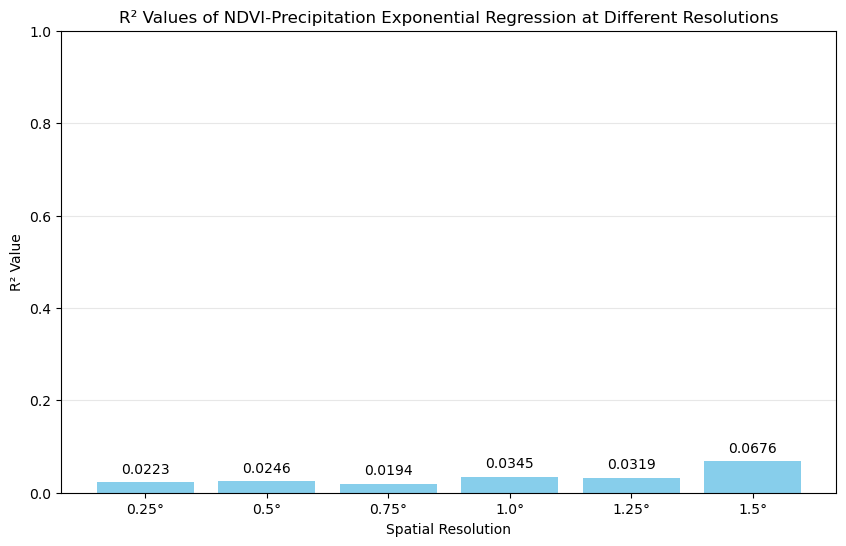


Corrected R² Value Summary:
  Resolution 0.25°: R² = 0.0223
  Resolution 0.5°: R² = 0.0246
  Resolution 0.75°: R² = 0.0194
  Resolution 1.0°: R² = 0.0345
  Resolution 1.25°: R² = 0.0319
  Resolution 1.5°: R² = 0.0676

Best Resolution: 1.5° (R² = 0.0676)
Best Fit Parameters: a=0.0477, b=1.2106
Regression Equation: P = exp(0.0477 * e^(1.2106 * NDVI))


In [17]:
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Configure data directory
data_dir = r"D:/Desktop/mentor_research/code/dataset/NDVI_processed/resampled"

# Define resolutions
resolutions = [0.25, 0.5, 0.75, 1.0, 1.25, 1.5]

# Load NDVI and precipitation data
ndvi_datasets = {}
precip_datasets = {}

for res in resolutions:
    # Construct file paths
    ndvi_path = os.path.join(data_dir, f"NDVI_2001_res{res:.2f}.nc")
    precip_path = os.path.join(data_dir, f"PRECIP_2001_res{res:.2f}.nc")
    
    # Check if files exist
    if os.path.exists(ndvi_path) and os.path.exists(precip_path):
        print(f"Loading {res}° resolution data...")
        
        # Read data
        ndvi_datasets[res] = xr.open_dataset(ndvi_path)
        precip_datasets[res] = xr.open_dataset(precip_path)
    else:
        print(f"Warning: {res}° resolution files are incomplete, skipping.")

# Define the correct exponential function: Precipitation as response variable
def exp_func(ndvi, a, b):
    return a * np.exp(b * ndvi)

# Store R² values and parameters
r2_values = {}
params_values = {}

# Create figure for visualization
plt.figure(figsize=(20, 15))

# Perform regression for each resolution
for i, res in enumerate(resolutions):
    if res not in ndvi_datasets or res not in precip_datasets:
        continue

    print(f"\nAnalyzing {res}° resolution data...")

    # Get NDVI data
    ndvi_var_name = list(ndvi_datasets[res].data_vars)[0]
    ndvi_data = ndvi_datasets[res][ndvi_var_name].values.flatten()

    # Get precipitation data
    precip_data = precip_datasets[res].precipitation.values.flatten()

    # Mask invalid values
    valid_mask = ~(np.isnan(ndvi_data) | np.isnan(precip_data) | np.isinf(ndvi_data) | np.isinf(precip_data))
    valid_ndvi = ndvi_data[valid_mask]
    valid_precip = precip_data[valid_mask]

    # Filter out extreme values
    if len(valid_ndvi) == 0:
        print(f"Warning: No valid data points for {res}° resolution, skipping...")
        continue

    # Set upper bounds to avoid overflow in exp function
    valid_ndvi = np.clip(valid_ndvi, -2, 2)  # NDVI typically ranges from -1 to 1
    valid_precip = np.clip(valid_precip, 0, 5000)  # Assume precipitation in mm, prevent extreme values

    # Log transform precipitation to improve stability
    valid_precip = np.log1p(valid_precip)  # log(1+precip) to prevent log(0)

    # Perform exponential regression
    try:
        p0 = [0.1, 0.1]  # Initial parameter guesses

        # Fit the curve
        params, _ = curve_fit(exp_func, valid_ndvi, valid_precip, p0=p0, maxfev=10000)

        # Compute predicted precipitation
        y_pred = exp_func(valid_ndvi, *params)

        # Calculate R²
        r2 = r2_score(valid_precip, y_pred)

        # Store results
        r2_values[res] = r2
        params_values[res] = params

        print(f"Resolution {res}°:")
        print(f"  Parameters: a={params[0]:.4f}, b={params[1]:.4f}")
        print(f"  R² = {r2:.4f}")

        # Plot scatter plot and fitted curve
        plt.subplot(2, 3, i + 1)

        # Plot scatter points (sample if too many)
        if len(valid_ndvi) > 5000:
            idx = np.random.choice(len(valid_ndvi), 5000, replace=False)
            plt.scatter(valid_ndvi[idx], np.expm1(valid_precip[idx]), alpha=0.3, s=5)  # Reverse log transform
        else:
            plt.scatter(valid_ndvi, np.expm1(valid_precip), alpha=0.3, s=5)  # Reverse log transform

        # Sort NDVI for smooth curve plotting
        sorted_idx = np.argsort(valid_ndvi)
        sorted_x = valid_ndvi[sorted_idx]

        # Plot fitted curve
        plt.plot(sorted_x, np.expm1(exp_func(sorted_x, *params)), 'r-', linewidth=2)  # Reverse log transform

        plt.title(f'Resolution: {res}°\nR² = {r2:.4f}')
        plt.xlabel('NDVI')  # NDVI is now the independent variable
        plt.ylabel('Precipitation (mm)')  # Precipitation is the response variable
        plt.grid(True, alpha=0.3)

        # Add equation text
        equation = f'P = exp({params[0]:.3f} * e^({params[1]:.3f} * NDVI))'
        plt.annotate(equation, xy=(0.05, 0.95), xycoords='axes fraction',
                     fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.7))

    except Exception as e:
        print(f"Warning: Regression failed for {res}° resolution: {str(e)}")

plt.tight_layout()
plt.savefig(os.path.join(data_dir, "Corrected_NDVI_Precip_Regression_All.png"), dpi=300)
plt.close()

# Compare R² values for different resolutions
if r2_values:
    plt.figure(figsize=(10, 6))

    # Extract resolution and R² values
    res_values = list(r2_values.keys())
    r2_list = [r2_values[r] for r in res_values]

    # Plot bar chart
    plt.bar(range(len(res_values)), r2_list, color='skyblue')
    plt.xticks(range(len(res_values)), [f"{r}°" for r in res_values])
    plt.ylim(0, 1)  # R² values range from 0 to 1

    # Annotate R² values
    for i, r2 in enumerate(r2_list):
        plt.text(i, r2 + 0.02, f"{r2:.4f}", ha='center')

    plt.title('R² Values of NDVI-Precipitation Exponential Regression at Different Resolutions')
    plt.xlabel('Spatial Resolution')
    plt.ylabel('R² Value')
    plt.grid(True, axis='y', alpha=0.3)

    plt.savefig(os.path.join(data_dir, "Corrected_R2_Comparison.png"), dpi=300)
    plt.show()

    # Print summary of R² values
    print("\nCorrected R² Value Summary:")
    for res, r2 in sorted(r2_values.items()):
        print(f"  Resolution {res}°: R² = {r2:.4f}")

    # Determine best resolution
    best_res = max(r2_values, key=r2_values.get)
    print(f"\nBest Resolution: {best_res}° (R² = {r2_values[best_res]:.4f})")
    print(f"Best Fit Parameters: a={params_values[best_res][0]:.4f}, b={params_values[best_res][1]:.4f}")
    print(f"Regression Equation: P = exp({params_values[best_res][0]:.4f} * e^({params_values[best_res][1]:.4f} * NDVI))")
else:
    print("No valid regression analysis was completed for any resolution.")


In [18]:
# Store NDVI range for each resolution
ndvi_ranges = {}

for res in resolutions:
    if res in ndvi_datasets:
        ndvi_var_name = list(ndvi_datasets[res].data_vars)[0]
        ndvi_min = np.nanmin(ndvi_datasets[res][ndvi_var_name].values)
        ndvi_max = np.nanmax(ndvi_datasets[res][ndvi_var_name].values)
        ndvi_ranges[res] = (ndvi_min, ndvi_max)

# Convert to a DataFrame for better visualization
import pandas as pd
ndvi_range_df = pd.DataFrame.from_dict(ndvi_ranges, orient='index', columns=['Min NDVI', 'Max NDVI'])

ndvi_range_df

,Min NDVI,Max NDVI
0.25,-0.089431,0.932213
0.50,-0.057799,0.890970
0.75,0.000000,0.874846
1.00,0.000000,0.850192
1.25,0.000000,0.887509
1.50,0.000000,0.859880



Processing 0.25° resolution data...
Resolution 0.25°:
  Parameters: a=0.0675, b=0.6989
  R² = 0.0204

Processing 0.5° resolution data...
Resolution 0.5°:
  Parameters: a=0.0661, b=0.7497
  R² = 0.0224

Processing 0.75° resolution data...
Resolution 0.75°:
  Parameters: a=0.0705, b=0.6437
  R² = 0.0183

Processing 1.0° resolution data...
Resolution 1.0°:
  Parameters: a=0.0617, b=0.9371
  R² = 0.0326

Processing 1.25° resolution data...
Resolution 1.25°:
  Parameters: a=0.0583, b=0.9633
  R² = 0.0317

Processing 1.5° resolution data...
Resolution 1.5°:
  Parameters: a=0.0495, b=1.3274
  R² = 0.0639


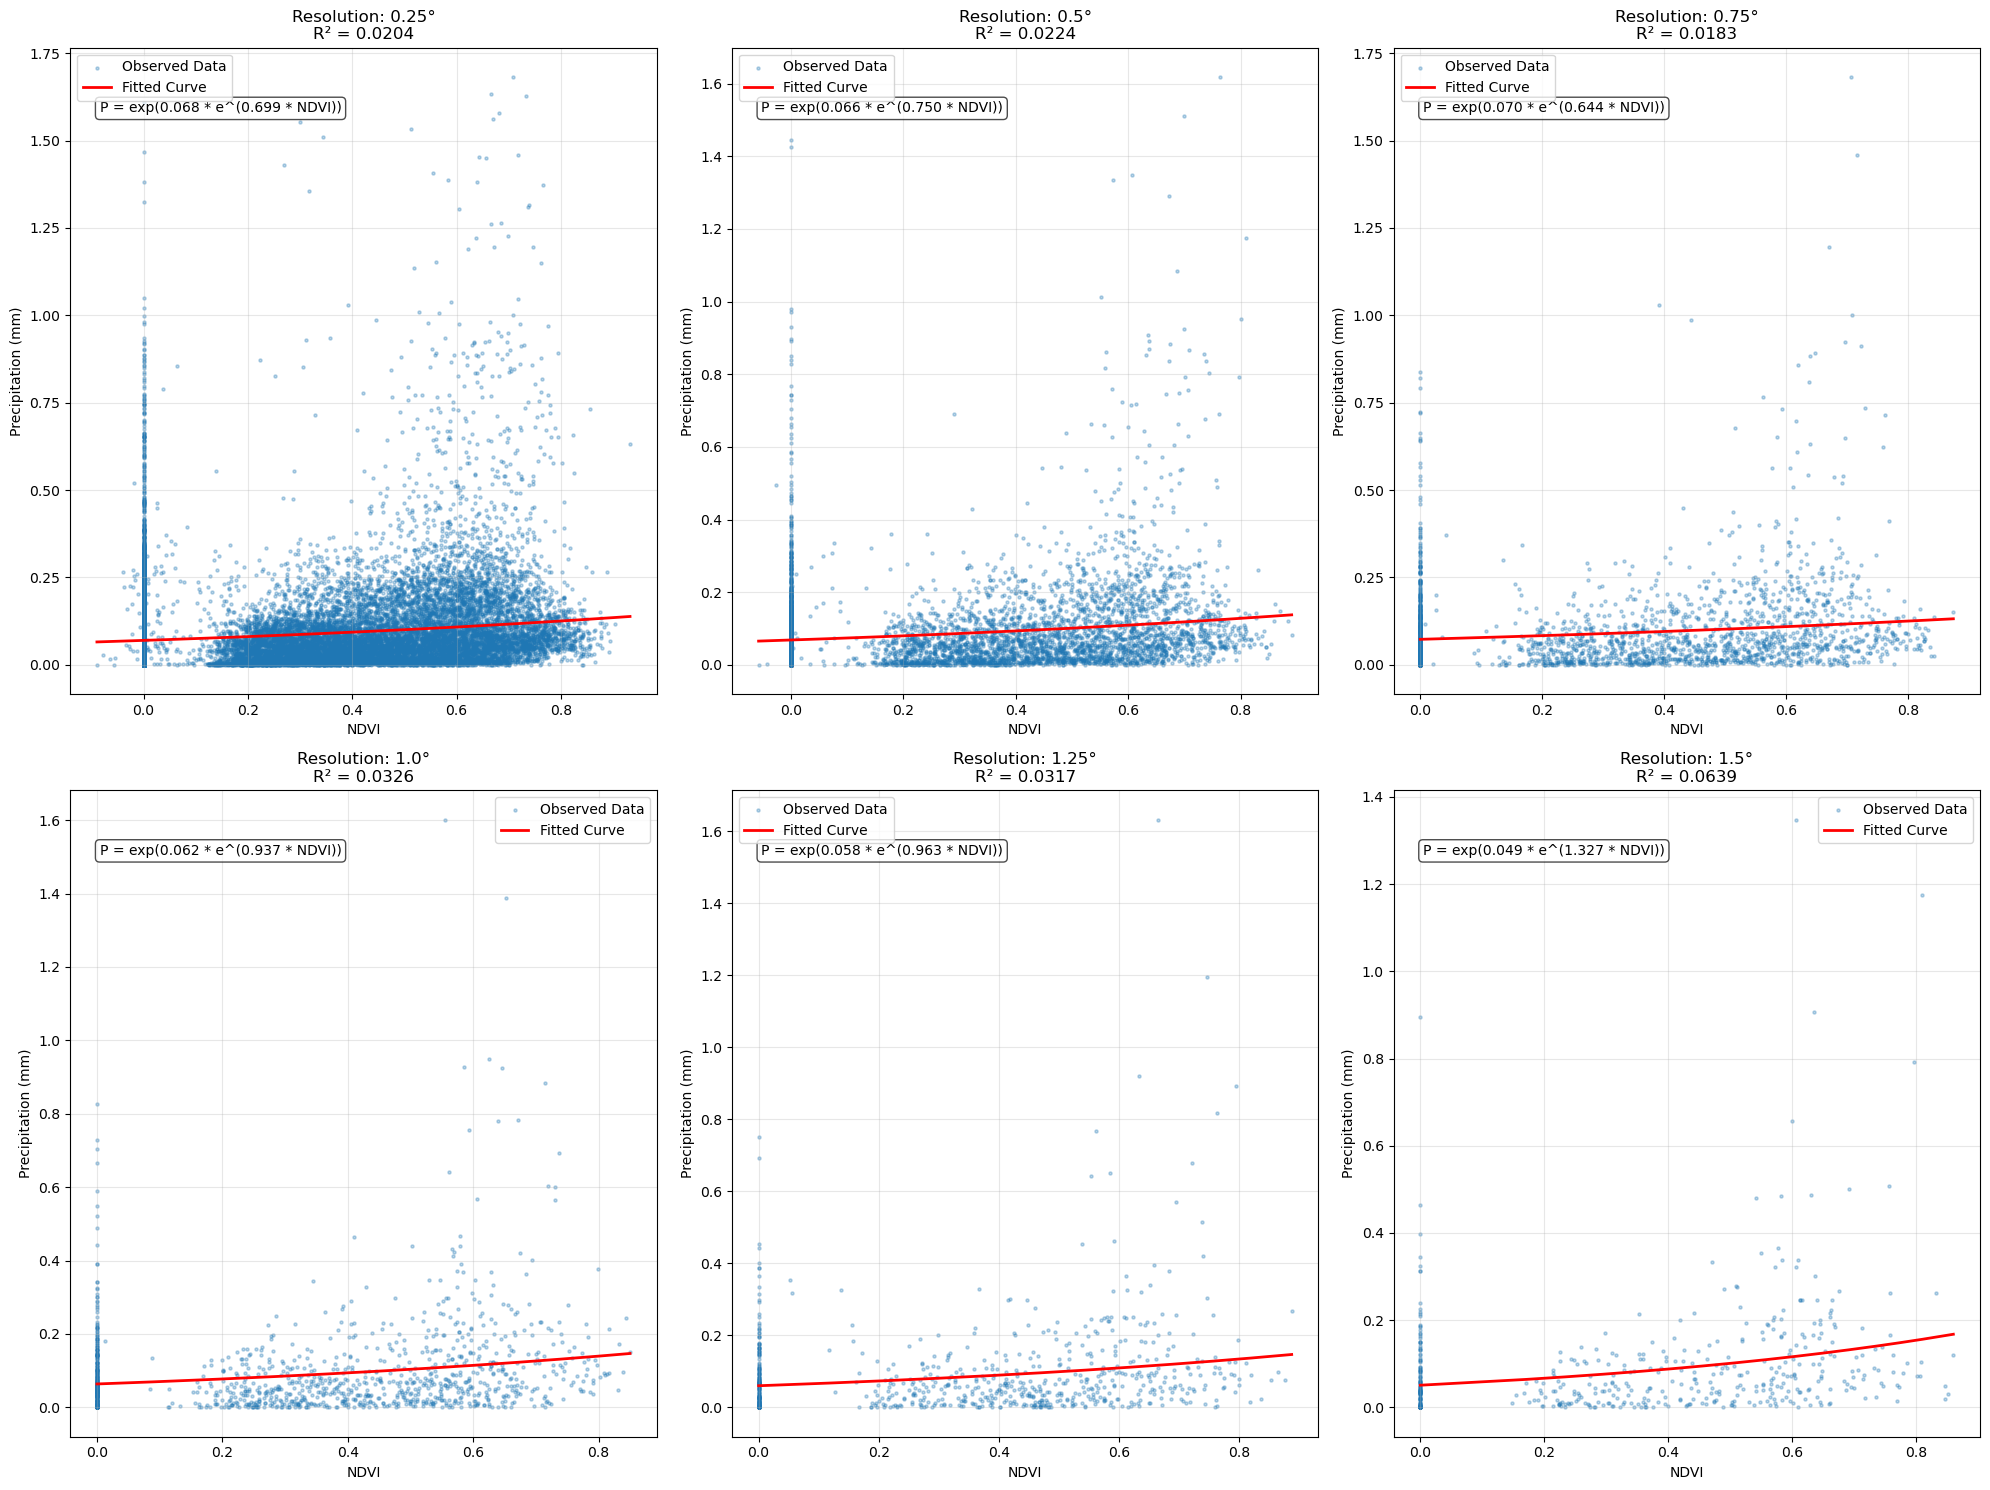

In [19]:
# Create a figure for visualization of both scatter plots and fitted curves
plt.figure(figsize=(20, 15))

# Perform regression and plot for each resolution
for i, res in enumerate(resolutions):
    if res not in ndvi_datasets or res not in precip_datasets:
        continue

    print(f"\nProcessing {res}° resolution data...")

    # Get NDVI and precipitation data
    ndvi_var_name = list(ndvi_datasets[res].data_vars)[0]
    ndvi_data = ndvi_datasets[res][ndvi_var_name].values.flatten()
    precip_data = precip_datasets[res].precipitation.values.flatten()

    # Mask invalid values
    valid_mask = ~(np.isnan(ndvi_data) | np.isnan(precip_data) | np.isinf(ndvi_data) | np.isinf(precip_data))
    valid_ndvi = ndvi_data[valid_mask]
    valid_precip = precip_data[valid_mask]

    # Ensure valid data points exist
    if len(valid_ndvi) == 0:
        print(f"Warning: No valid data points for {res}° resolution, skipping...")
        continue

    # Clip extreme values to prevent overflow issues in exp function
    valid_ndvi = np.clip(valid_ndvi, -2, 2)  
    valid_precip = np.clip(valid_precip, 0, 5000)  



    # Perform exponential regression
    try:
        p0 = [0.1, 0.1]  # Initial parameter guesses

        # Fit the curve
        params, _ = curve_fit(exp_func, valid_ndvi, valid_precip, p0=p0, maxfev=10000)

        # Compute predicted precipitation values
        y_pred = exp_func(valid_ndvi, *params)
        if res==0.25:
            y_pred025 = y_pred
        # Calculate R²
        r2 = r2_score(valid_precip, y_pred)

        # Store results
        r2_values[res] = r2
        params_values[res] = params

        print(f"Resolution {res}°:")
        print(f"  Parameters: a={params[0]:.4f}, b={params[1]:.4f}")
        print(f"  R² = {r2:.4f}")

        # Plot scatter points and fitted curve
        plt.subplot(2, 3, i + 1)

        plt.scatter(valid_ndvi, np.expm1(valid_precip), alpha=0.3, s=5, label="Observed Data")

        # Sort NDVI for smooth curve plotting
        sorted_idx = np.argsort(valid_ndvi)
        sorted_x = valid_ndvi[sorted_idx]

        # Plot fitted exponential curve
        plt.plot(sorted_x, np.expm1(exp_func(sorted_x, *params)), 'r-', linewidth=2, label="Fitted Curve")

        plt.title(f'Resolution: {res}°\nR² = {r2:.4f}')
        plt.xlabel('NDVI')
        plt.ylabel('Precipitation (mm)')
        plt.grid(True, alpha=0.3)
        plt.legend()

        # Add equation annotation
        equation = f'P = exp({params[0]:.3f} * e^({params[1]:.3f} * NDVI))'
        plt.annotate(equation, xy=(0.05, 0.90), xycoords='axes fraction',
                     fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.7))

    except Exception as e:
        print(f"Warning: Regression failed for {res}° resolution: {str(e)}")

plt.tight_layout()
plt.savefig(os.path.join(data_dir, "NDVI_Precip_Fitted_Curve.png"), dpi=300)
plt.show()


## Apply on NDVI(1km)

In [20]:
ndvi_ds_1km

<xarray.DataArray (time: 12, lats: 892, lons: 1336)>
array([[[0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , ..., 0.6247, 0.6247, 0.6186],
        [0.    , 0.    , 0.    , ..., 0.6192, 0.6192, 0.5791],
        ...,
        [0.    , 0.    , 0.    , ..., 0.224 , 0.224 , 0.1662],
        [0.    , 0.    , 0.    , ..., 0.2035, 0.2035, 0.1763],
        [0.    , 0.    , 0.    , ..., 0.1707, 0.1707, 0.1954]],

       [[0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , ..., 0.5994, 0.5994, 0.5946],
        [0.    , 0.    , 0.    , ..., 0.5929, 0.5929, 0.5884],
        ...,
        [0.    , 0.    , 0.    , ..., 0.2289, 0.2289, 0.1772],
        [0.    , 0.    , 0.    , ..., 0.2119, 0.2119, 0.2075],
        [0.    , 0.    , 0.    , ..., 0.1824, 0.1824, 0.2394]],

       [[0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , ..., 0.6892, 0.6892, 0.6395],
        [0.    , 0.    , 0.    , ..., 0.6514, 0.6514, 0.5865],
        ...,
...
        ...,
        [0.    , 0.    , 0.    , ..., 0.1168, 0.1168, 0.1182],
        [0.    , 0.    , 0.    , ..., 0.1241, 0.1241, 0.1337],
        [0.    , 0.    , 0.    , ..., 0.1083, 0.1083, 0.1155]],

       [[0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , ..., 0.6036, 0.6036, 0.6462],
        [0.    , 0.    , 0.    , ..., 0.6014, 0.6014, 0.6645],
        ...,
        [0.    , 0.    , 0.    , ..., 0.1093, 0.1093, 0.1164],
        [0.    , 0.    , 0.    , ..., 0.1169, 0.1169, 0.1323],
        [0.    , 0.    , 0.    , ..., 0.1195, 0.1195, 0.1214]],

       [[0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , ..., 0.5656, 0.5656, 0.593 ],
        [0.    , 0.    , 0.    , ..., 0.5316, 0.5316, 0.5939],
        ...,
        [0.    , 0.    , 0.    , ..., 0.1227, 0.1227, 0.1295],
        [0.    , 0.    , 0.    , ..., 0.1324, 0.1324, 0.1395],
        [0.    , 0.    , 0.    , ..., 0.1267, 0.1267, 0.1202]]])
Coordinates:
  * lats     (lats) float64 44.01 44.0 43.99 43.98 ... 36.03 36.02 36.01 36.0
  * lons     (lons) float64 -9.001 -8.992 -8.983 -8.974 ... 2.973 2.982 2.991
  * time     (time) datetime64[ns] 2001-01-01 2001-02-01 ... 2001-12-01

In [ ]:
'ndvi_2001_1km.nc'

# $P_e$(1km) with best coef

Loading 1km resolution NDVI data...
NDVI data shape: (12, 892, 1336)
NDVI data dimensions: ('time', 'lats', 'lons')
Predicting precipitation from NDVI...
Predicted precipitation data generated, preparing visualization...


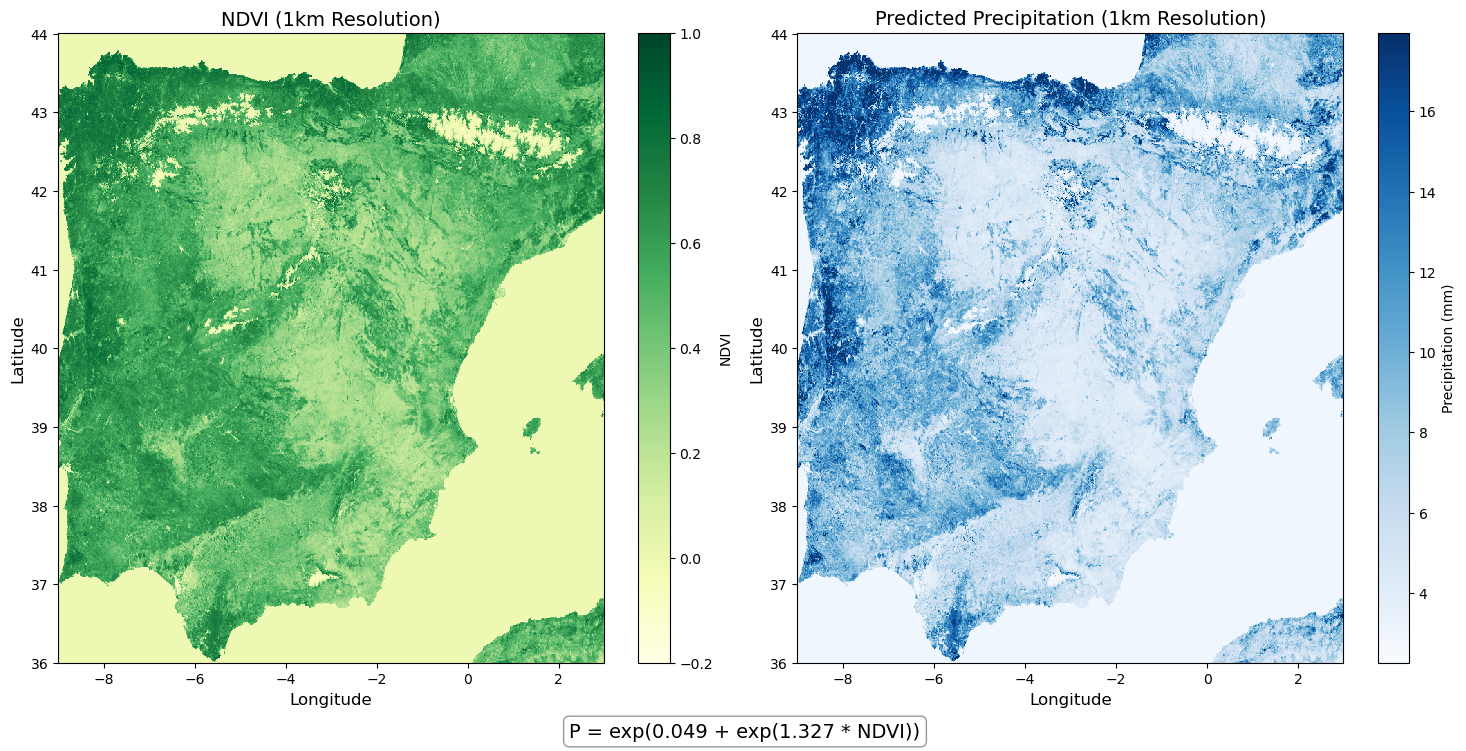

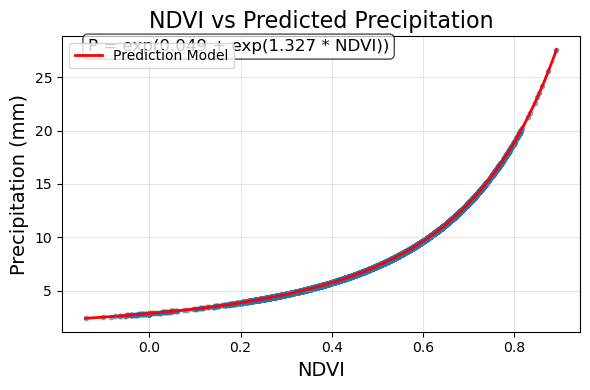

Precipitation prediction and visualization completed


In [ ]:
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Configure data directory
data_dir = r"D:\Desktop\mentor_research\code\dataset\NDVI_processed"

# Define the prediction formula: P = exp(0.049 + exp(1.327 * NDVI))
def predict_precipitation(ndvi):
    """Predict precipitation from NDVI using the given formula"""
    return np.exp(0.049 + np.exp(1.327 * ndvi))

# Main program
def main():
    # Build the file path for the 1km resolution NDVI file
    ndvi_path = os.path.join(data_dir, "ndvi_2001_1km.nc")
    
    # Check if the file exists
    if not os.path.exists(ndvi_path):
        print(f"Error: NDVI file not found: {ndvi_path}")
        return
    
    print("Loading 1km resolution NDVI data...")
    
    # Read NDVI data
    ndvi_ds = xr.open_dataset(ndvi_path)
    
    # Get the NDVI variable name and data
    ndvi_var_name = list(ndvi_ds.data_vars)[0]
    ndvi_data = ndvi_ds[ndvi_var_name]
    
    print(f"NDVI data shape: {ndvi_data.shape}")
    print(f"NDVI data dimensions: {ndvi_data.dims}")
    
    # Create the predicted precipitation dataset
    print("Predicting precipitation from NDVI...")
    
    # Handle invalid values using a mask
    # Create a mask to identify valid (non-NaN) values
    valid_mask = ~np.isnan(ndvi_data)
    
    # Create an xarray object for precipitation with the same shape as NDVI, initialized to NaN
    precip_data = xr.zeros_like(ndvi_data)
    precip_data.values[:] = np.nan
    
    # Predict precipitation only for valid NDVI values
    precip_data.values[valid_mask.values] = predict_precipitation(ndvi_data.values[valid_mask.values])
    
    # Convert the predicted result to an xarray DataArray, preserving the same coordinates and dimensions as NDVI
    precip_array = xr.DataArray(
        data=precip_data.values,
        dims=ndvi_data.dims,
        coords=ndvi_data.coords,
        name="precipitation"
    )
    
    # Create a new Dataset
    precip_ds_1km = xr.Dataset({"precipitation": precip_array})
    
    # Add global attributes
    precip_ds_1km.attrs["title"] = "Predicted Precipitation from NDVI"
    precip_ds_1km.attrs["source"] = "Derived from NDVI using exponential model"
    precip_ds_1km.attrs["model_equation"] = "P = exp(0.049 + exp(1.327 * NDVI))"
    
    # Add variable attributes
    precip_ds_1km.precipitation.attrs["units"] = "mm"
    precip_ds_1km.precipitation.attrs["long_name"] = "Predicted Precipitation"
    output_filepath = f"{data_dir}/predicted_precipitation_1km.nc"

    # Save the Dataset to a NetCDF file
    precip_ds_1km.to_netcdf(output_filepath)
    
    # Print progress information (do not save the file again)
    print("Predicted precipitation data generated, preparing visualization...")
    
    # Visualize the results
    visualize_results(ndvi_data, precip_array, data_dir)
    
    print("Precipitation prediction and visualization completed")

    # Close the dataset
    ndvi_ds.close()

def visualize_results(ndvi_data, precip_data, data_dir):
    """Visualize NDVI and predicted precipitation data"""
    
    # Select a time point for visualization (if a time dimension exists)
    if 'time' in ndvi_data.dims:
        time_index = 0  # Use the first time point
        ndvi_slice = ndvi_data.isel(time=time_index)
        precip_slice = precip_data.isel(time=time_index)
    else:
        ndvi_slice = ndvi_data
        precip_slice = precip_data
    
    # Create a 2-panel layout
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7.5))
    
    # Get the names of the longitude and latitude coordinates
    lon_name = [dim for dim in ndvi_slice.dims if 'lon' in dim.lower() or 'x' in dim.lower()][0]
    lat_name = [dim for dim in ndvi_slice.dims if 'lat' in dim.lower() or 'y' in dim.lower()][0]
    
    # Plot NDVI data
    ndvi_plot = ax1.pcolormesh(ndvi_slice[lon_name], ndvi_slice[lat_name], ndvi_slice, 
                             cmap='YlGn', shading='auto')
    ax1.set_title('NDVI (1km Resolution)', fontsize=14)
    ax1.set_xlabel('Longitude', fontsize=12)
    ax1.set_ylabel('Latitude', fontsize=12)
    fig.colorbar(ndvi_plot, ax=ax1, label='NDVI')
    
    # Plot predicted precipitation data
    # Use logarithmic normalization to better display the range of precipitation values
    precip_plot = ax2.pcolormesh(precip_slice[lon_name], precip_slice[lat_name], precip_slice, 
                               cmap='Blues', shading='auto', 
                               norm=Normalize(vmin=np.nanmin(precip_slice), 
                                              vmax=np.nanpercentile(precip_slice, 99)))
    ax2.set_title('Predicted Precipitation (1km Resolution)', fontsize=14)
    ax2.set_xlabel('Longitude', fontsize=12)
    ax2.set_ylabel('Latitude', fontsize=12)
    fig.colorbar(precip_plot, ax=ax2, label='Precipitation (mm)')
    
    # Add the equation as a text annotation
    equation = "P = exp(0.049 + exp(1.327 * NDVI))"
    fig.text(0.5, 0.01, equation, ha='center', fontsize=14, 
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
    
    plt.tight_layout(rect=[0, 0.03, 1, 1])  # Adjust layout to accommodate the bottom text
    
    # Display the image instead of saving
    plt.tight_layout(rect=[0, 0.03, 1, 1])
    plt.show()
    
    # Create a scatter plot to compare NDVI and predicted precipitation
    plt.figure(figsize=(6, 4))
    
    # Prepare data (flatten and filter out NaN values)
    valid_mask = (~np.isnan(ndvi_slice.values)) & (~np.isnan(precip_slice.values))
    valid_ndvi = ndvi_slice.values[valid_mask]
    valid_precip = precip_slice.values[valid_mask]
    
    # If there are too many points, randomly sample
    if len(valid_ndvi) > 5000:
        idx = np.random.choice(len(valid_ndvi), 5000, replace=False)
        valid_ndvi = valid_ndvi[idx]
        valid_precip = valid_precip[idx]
    
    # Plot scatter plot
    plt.scatter(valid_ndvi, valid_precip, alpha=0.5, s=10)
    
    # Plot the prediction curve for comparison
    ndvi_range = np.linspace(np.min(valid_ndvi), np.max(valid_ndvi), 100)
    predicted_precip = predict_precipitation(ndvi_range)
    plt.plot(ndvi_range, predicted_precip, 'r-', linewidth=2, label='Prediction Model')
    
    plt.title('NDVI vs Predicted Precipitation', fontsize=16)
    plt.xlabel('NDVI', fontsize=14)
    plt.ylabel('Precipitation (mm)', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    # Add the equation as a text annotation
    plt.annotate(equation, xy=(0.05, 0.95), xycoords='axes fraction', 
                fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.7))
    
    # Display the image instead of saving
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


In [22]:
output_dir = r"D:\Desktop\mentor_research\code\dataset\Precipitation_processed"
precip_file = "precip_2001_resampled.nc"
precip_path = os.path.join(output_dir, precip_file)

if not os.path.exists(precip_path):
    print(f"错误: 文件不存在: {precip_path}")
else:
    precip_ds = xr.open_dataset(precip_path)
precip_ds

<xarray.Dataset>
Dimensions:        (lons: 48, lats: 32, time: 12)
Coordinates:
  * lons           (lons) float64 -8.875 -8.625 -8.375 ... 2.375 2.625 2.875
  * lats           (lats) float64 36.12 36.38 36.62 36.88 ... 43.38 43.62 43.88
  * time           (time) datetime64[ns] 2001-01-01 2001-02-01 ... 2001-12-01
Data variables:
    precipitation  (time, lats, lons) float32 ...

# Calculate the residuals: precipitation_0.25 - original precipitation_0.25
# and then interpolate it into 1km

Precipitation shape: (12, 32, 48)
y_pred025 shape: (18432,)


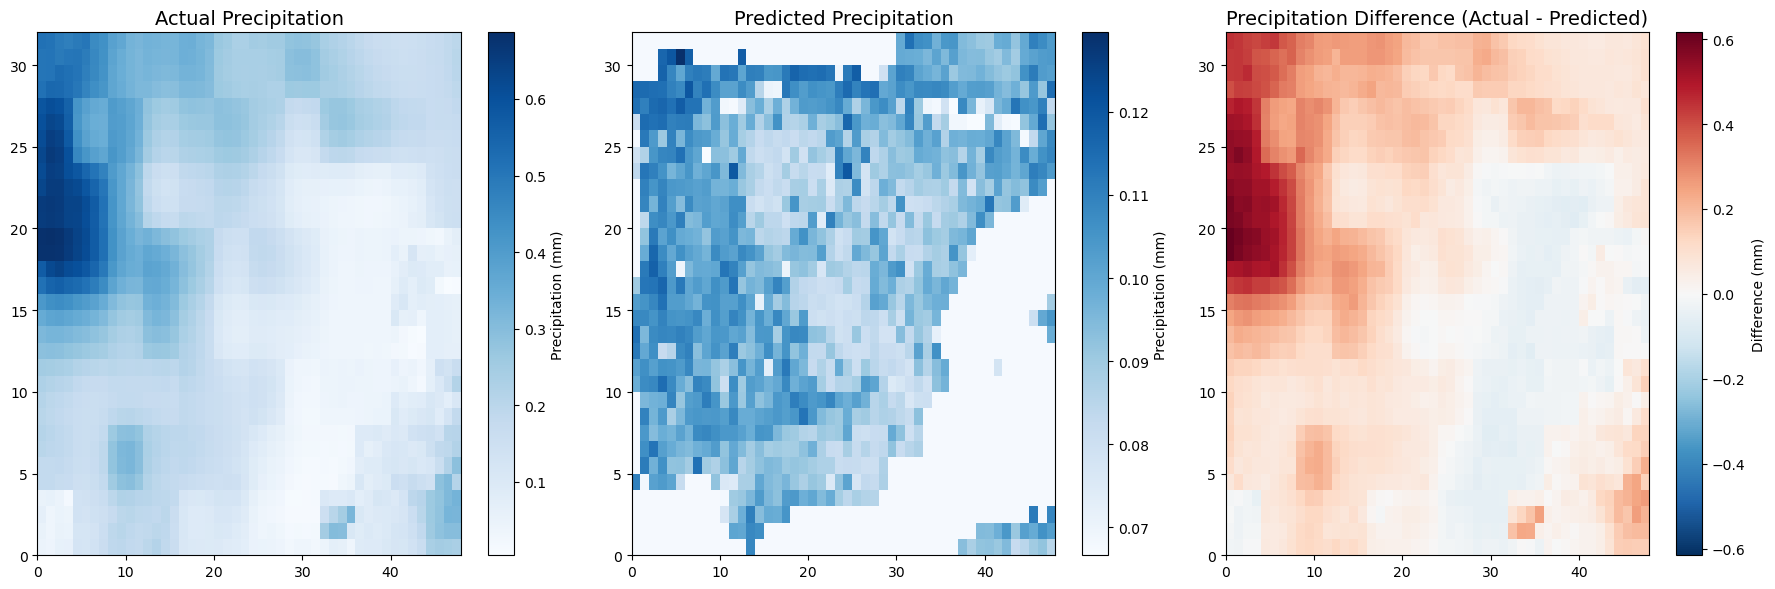

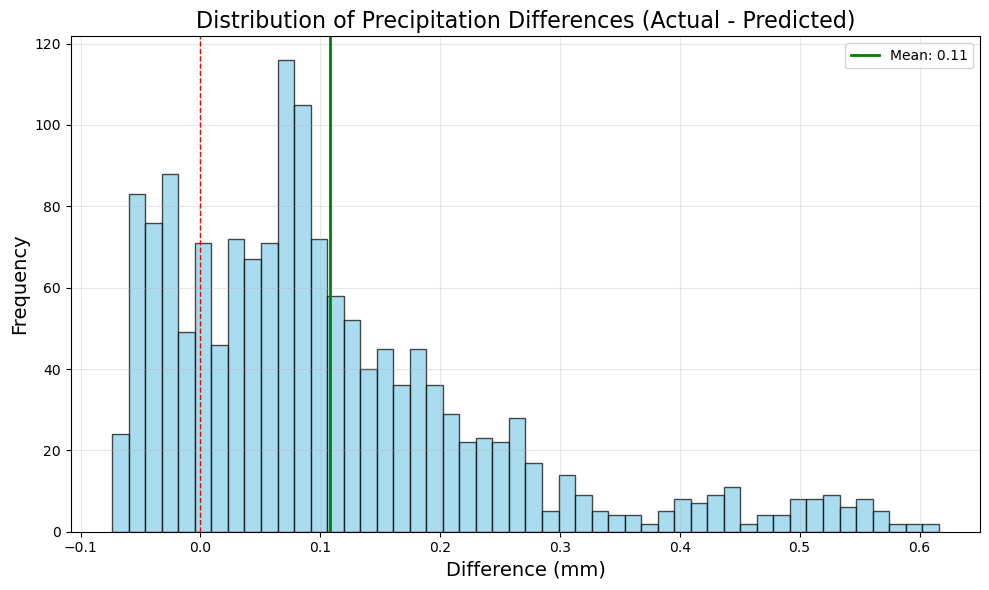

Difference statistics:
  Mean: 0.0002 mm
  Median: -0.0270 mm
  Standard deviation: 0.0993 mm
  Minimum: -0.1212 mm
  Maximum: 0.8923 mm


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib.colors import TwoSlopeNorm

# Get shape information
precip_shape = precip_ds.precipitation.shape
print(f"Precipitation shape: {precip_shape}")
print(f"y_pred025 shape: {y_pred025.shape}")

# Ensure the prediction array has the same number of elements as precipitation
expected_elements = np.prod(precip_shape)
if len(y_pred025) == expected_elements:
    # Reshape prediction array to match precipitation shape
    y_pred025_reshaped = y_pred025.reshape(precip_shape)
    
    # Calculate difference: actual precipitation - predicted precipitation
    difference = precip_ds.precipitation.values - y_pred025_reshaped
    
    # Create a DataArray with the same structure as precipitation to store differences
    diff_da = precip_ds.precipitation.copy()
    diff_da.values = difference
    diff_da.name = "precipitation_difference"
    diff_da.attrs["long_name"] = "Difference between actual and predicted precipitation"
    diff_da.attrs["units"] = "mm"
    
    # Visualize difference - select first time point
    if 'time' in diff_da.dims:
        time_index = 0  # Use the first time point
        diff_slice = diff_da.isel(time=time_index)
        precip_slice = precip_ds.precipitation.isel(time=time_index)
        pred_slice = y_pred025_reshaped[time_index]
    else:
        diff_slice = diff_da
        precip_slice = precip_ds.precipitation
        pred_slice = y_pred025_reshaped
    
    # Create three-panel figure
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # 1. Plot actual precipitation
    im1 = axes[0].pcolormesh(precip_slice, cmap='Blues', shading='auto')
    axes[0].set_title('Actual Precipitation', fontsize=14)
    fig.colorbar(im1, ax=axes[0], label='Precipitation (mm)')
    
    # 2. Plot predicted precipitation
    im2 = axes[1].pcolormesh(pred_slice, cmap='Blues', shading='auto')
    axes[1].set_title('Predicted Precipitation', fontsize=14)
    fig.colorbar(im2, ax=axes[1], label='Precipitation (mm)')
    
    # 3. Plot difference
    # Calculate absolute maximum of difference for symmetric colorbar
    abs_max = max(abs(np.nanmin(diff_slice)), abs(np.nanmax(diff_slice)))
    
    # Use divergent colormap to display difference
    norm = TwoSlopeNorm(vmin=-abs_max, vcenter=0, vmax=abs_max)
    im3 = axes[2].pcolormesh(diff_slice, cmap='RdBu_r', norm=norm, shading='auto')
    axes[2].set_title('Precipitation Difference (Actual - Predicted)', fontsize=14)
    fig.colorbar(im3, ax=axes[2], label='Difference (mm)')
    
    # Display the figure
    plt.tight_layout()
    plt.show()
    
    # Create histogram of differences
    plt.figure(figsize=(10, 6))
    
    # Flatten and filter out NaN values
    flat_diff = diff_slice.values.flatten()
    valid_diff = flat_diff[~np.isnan(flat_diff)]
    
    # Plot histogram
    plt.hist(valid_diff, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    plt.axvline(x=0, color='r', linestyle='--', linewidth=1)
    plt.axvline(x=np.mean(valid_diff), color='g', linestyle='-', linewidth=2,
                label=f'Mean: {np.mean(valid_diff):.2f}')
    
    # Add title and labels
    plt.title('Distribution of Precipitation Differences (Actual - Predicted)', fontsize=16)
    plt.xlabel('Difference (mm)', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    # Display the figure
    plt.tight_layout()
    plt.show()
    
    # Calculate some statistics
    mean_diff = np.nanmean(difference)
    median_diff = np.nanmedian(difference)
    std_diff = np.nanstd(difference)
    min_diff = np.nanmin(difference)
    max_diff = np.nanmax(difference)
    
    # Output statistics
    print(f"Difference statistics:")
    print(f"  Mean: {mean_diff:.4f} mm")
    print(f"  Median: {median_diff:.4f} mm") 
    print(f"  Standard deviation: {std_diff:.4f} mm")
    print(f"  Minimum: {min_diff:.4f} mm")
    print(f"  Maximum: {max_diff:.4f} mm")
 
else:
    print(f"Error: Element count mismatch. Precipitation has {expected_elements} elements, while y_pred025 has {len(y_pred025)} elements.")

In [ ]:
diff_da# 0.25
diff_ds = diff_da.to_dataset(name="precipitation_difference")
print(diff_ds)


<xarray.Dataset>
Dimensions:                   (lons: 48, lats: 32, time: 12)
Coordinates:
  * lons                      (lons) float64 -8.875 -8.625 ... 2.625 2.875
  * lats                      (lats) float64 36.12 36.38 36.62 ... 43.62 43.88
  * time                      (time) datetime64[ns] 2001-01-01 ... 2001-12-01
Data variables:
    precipitation_difference  (time, lats, lons) float64 -0.02218 ... -0.0607


In [27]:
#1km
netcdf_filepath = f"{data_dir}/predicted_precipitation_1km.nc"
# Open the NetCDF file
loaded_precip_ds = xr.open_dataset(netcdf_filepath)
loaded_precip_ds

<xarray.Dataset>
Dimensions:        (lons: 1336, lats: 892, time: 12)
Coordinates:
  * lons           (lons) float64 -9.001 -8.992 -8.983 ... 2.973 2.982 2.991
  * lats           (lats) float64 44.01 44.0 43.99 43.98 ... 36.02 36.01 36.0
  * time           (time) int32 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    precipitation  (time, lats, lons) float64 ...
Attributes:
    title:           Predicted Precipitation from NDVI
    source:          Derived from NDVI using exponential model
    model_equation:  P = exp(0.049 + exp(1.327 * NDVI))

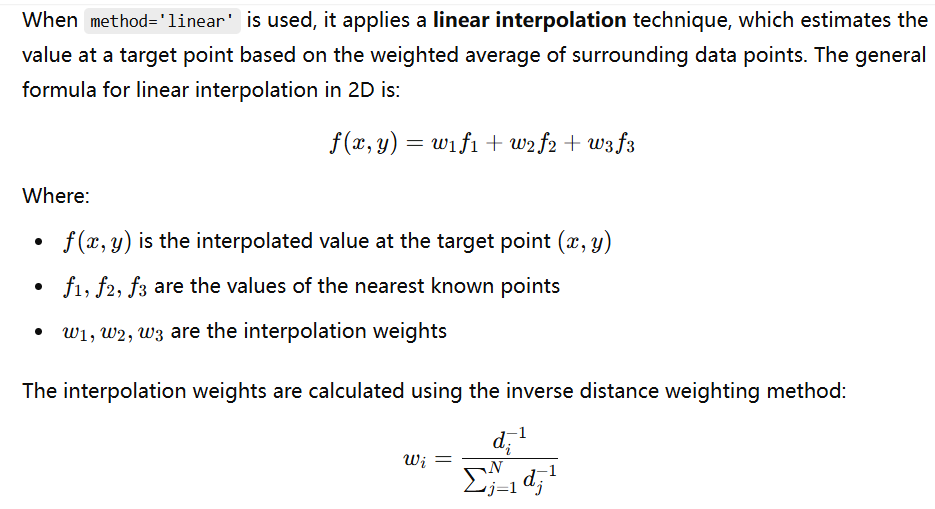
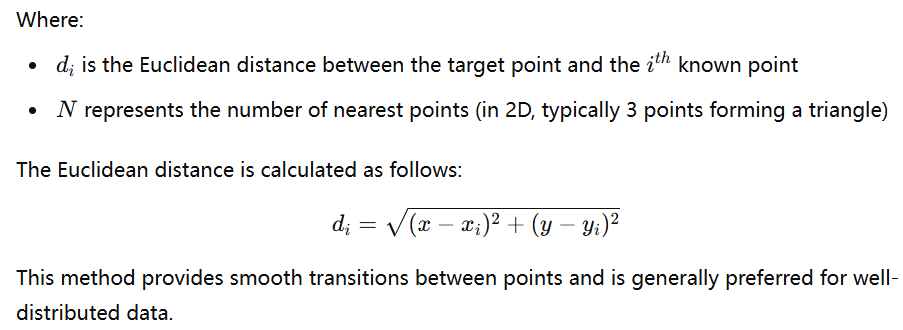

In [28]:
import xarray as xr
import numpy as np
from scipy.interpolate import griddata

# Extract coordinates
coarse_lons = diff_ds.lons.values
coarse_lats = diff_ds.lats.values

fine_lons = loaded_precip_ds.lons.values
fine_lats = loaded_precip_ds.lats.values

# Print coordinate ranges to verify they match
print(f"Coarse lats range: {coarse_lats.min()} to {coarse_lats.max()}")
print(f"Fine lats range: {fine_lats.min()} to {fine_lats.max()}")
print(f"Coarse lons range: {coarse_lons.min()} to {coarse_lons.max()}")
print(f"Fine lons range: {fine_lons.min()} to {fine_lons.max()}")

# Create grid points
coarse_lons_mesh, coarse_lats_mesh = np.meshgrid(coarse_lons, coarse_lats)
coarse_points = np.column_stack((coarse_lats_mesh.flatten(), coarse_lons_mesh.flatten()))

fine_lons_mesh, fine_lats_mesh = np.meshgrid(fine_lons, fine_lats)
fine_points = np.column_stack((fine_lats_mesh.flatten(), fine_lons_mesh.flatten()))

# Create an array to store the interpolation results
interpolated_data = np.zeros((diff_ds.time.size, len(fine_lats), len(fine_lons)))

# Perform interpolation for each time step
for t in range(diff_ds.time.size):
    # Extract data for the current time step
    data_slice = diff_ds.precipitation_difference.isel(time=t).values
    
    # Check for NaN values in the source data
    if np.any(np.isnan(data_slice)):
        print(f"NaN values found in source data at time step {t}")
    
    values = data_slice.flatten()
    
    # Use the linear interpolation method for greater stability
    interpolated_values = griddata(coarse_points, values, fine_points, method='linear')
    
    # Check the interpolation results
    nan_percentage = np.sum(np.isnan(interpolated_values)) / len(interpolated_values) * 100
    print(f"Time step {t}: {nan_percentage:.2f}% NaN values in interpolated result")
    
    # Reshape the result to a 2D grid
    interpolated_data[t] = interpolated_values.reshape(len(fine_lats), len(fine_lons))

# If there are still NaN values in the result, fill them using nearest neighbor interpolation
if np.any(np.isnan(interpolated_data)):
    print("Filling remaining NaN values with nearest neighbor interpolation")
    for t in range(diff_ds.time.size):
        data_slice = diff_ds.precipitation_difference.isel(time=t).values
        values = data_slice.flatten()
        
        # First, obtain a complete result using nearest neighbor interpolation
        nn_values = griddata(coarse_points, values, fine_points, method='nearest')
        
        # Replace NaN positions with the nearest neighbor interpolation result
        mask = np.isnan(interpolated_data[t].flatten())
        filled_values = interpolated_data[t].flatten()
        filled_values[mask] = nn_values[mask]
        
        interpolated_data[t] = filled_values.reshape(len(fine_lats), len(fine_lons))

# Create a DataArray for the interpolated results
interpolated_da = xr.DataArray(
    interpolated_data,
    coords={
        'time': diff_ds.time.values,
        'lat': fine_lats,
        'lon': fine_lons
    },
    dims=['time', 'lat', 'lon'],
    name='precipitation_difference'
)


Coarse lats range: 36.125 to 43.875
Fine lats range: 36.004476587510425 to 44.00846576901536
Coarse lons range: -8.875 to 2.875
Fine lons range: -9.001119146877606 to 2.9913898961180063
Time step 0: 5.28% NaN values in interpolated result
Time step 1: 5.28% NaN values in interpolated result
Time step 2: 5.28% NaN values in interpolated result
Time step 3: 5.28% NaN values in interpolated result
Time step 4: 5.28% NaN values in interpolated result
Time step 5: 5.28% NaN values in interpolated result
Time step 6: 5.28% NaN values in interpolated result
Time step 7: 5.28% NaN values in interpolated result
Time step 8: 5.28% NaN values in interpolated result
Time step 9: 5.28% NaN values in interpolated result
Time step 10: 5.28% NaN values in interpolated result
Time step 11: 5.28% NaN values in interpolated result
Filling remaining NaN values with nearest neighbor interpolation


In [29]:
interpolated_ds = interpolated_da.to_dataset(name="precipitation_difference")
#loaded_precip_ds

In [30]:
# Directly use numpy arrays for computation, bypassing xarray's alignment mechanism
result_ds = loaded_precip_ds.copy()

# Retrieve the numpy array of the original precipitation data
precip_data = loaded_precip_ds.precipitation.values

# Retrieve the numpy array of the interpolated precipitation difference data
diff_data = interpolated_ds.precipitation_difference.values

# Ensure the two arrays have the same shape
if precip_data.shape == diff_data.shape:
    # Directly add the numpy arrays
    adjusted_data = precip_data + diff_data
    
    # Create a new DataArray using the coordinates and dimensions from loaded_precip_ds
    result_ds['adjusted_precipitation'] = xr.DataArray(
        adjusted_data,
        coords=loaded_precip_ds.precipitation.coords,
        dims=loaded_precip_ds.precipitation.dims
    )
    
    print("Successfully added the interpolated precipitation difference to the original precipitation data")
else:
    print(f"Array shape mismatch: precip_data.shape = {precip_data.shape}, diff_data.shape = {diff_data.shape}")


Successfully added the interpolated precipitation difference to the original precipitation data


In [31]:
result_ds

<xarray.Dataset>
Dimensions:                 (lons: 1336, lats: 892, time: 12)
Coordinates:
  * lons                    (lons) float64 -9.001 -8.992 -8.983 ... 2.982 2.991
  * lats                    (lats) float64 44.01 44.0 43.99 ... 36.02 36.01 36.0
  * time                    (time) int32 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    precipitation           (time, lats, lons) float64 ...
    adjusted_precipitation  (time, lats, lons) float64 3.303 3.303 ... 3.379
Attributes:
    title:           Predicted Precipitation from NDVI
    source:          Derived from NDVI using exponential model
    model_equation:  P = exp(0.049 + exp(1.327 * NDVI))